# Checkpoint 1 - Análise Covid Brasil

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar dados

- Dados Covid Brasil

In [ ]:
! wget --no-check-certificate --content-disposition 'https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true'

--2021-08-29 21:10:11--  https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz [following]
--2021-08-29 21:10:11--  https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz [following]
--2021-08-29 21:10:11--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
! gunzip cases-brazil-cities-time.csv.gz

In [ ]:
dados_brasil = pd.read_csv('cases-brazil-cities-time.csv')

- Dados censo

In [ ]:
dados_censo = pd.read_csv('dados_municipios_2010.csv', sep = ';', decimal = ',', encoding = 'latin1')

## Ajustar dados

In [ ]:
max_date = max(dados_brasil['date'])

In [ ]:
dados_brasil = dados_brasil[(dados_brasil['date'] == max_date) & \
                            (dados_brasil['state'] != 'TOTAL')]

In [ ]:
cols = ['ibgeID', 'date', 'state', 'city', 'totalCases', 'deaths']

In [ ]:
dados_brasil = dados_brasil[cols].reset_index(drop=True)

## Aqui começa o trabalho

In [ ]:
dados_brasil.head(10)

,ibgeID,date,state,city,totalCases,deaths
0,5200050,2021-08-27,GO,Abadia de Goiás/GO,1739,37
1,3100104,2021-08-27,MG,Abadia dos Dourados/MG,555,17
2,5200100,2021-08-27,GO,Abadiânia/GO,498,42
3,1500107,2021-08-27,PA,Abaetetuba/PA,9257,224
4,3100203,2021-08-27,MG,Abaeté/MG,1587,39
5,2300101,2021-08-27,CE,Abaiara/CE,623,15
6,2900207,2021-08-27,BA,Abaré/BA,1023,11
7,4100103,2021-08-27,PR,Abatiá/PR,1118,20
8,2900108,2021-08-27,BA,Abaíra/BA,297,12
9,4200051,2021-08-27,SC,Abdon Batista/SC,441,4


In [ ]:
dados_censo.head(10)

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM
0,1100015,ALTA FLORESTA D'OESTE,70.75,8.67,13.00,476.99,0.641
1,1100023,ARIQUEMES,73.36,9.18,8.53,689.95,0.702
2,1100031,CABIXI,70.39,10.09,14.73,457.17,0.650
3,1100049,CACOAL,74.27,9.74,8.94,738.06,0.718
4,1100056,CEREJEIRAS,72.94,10.22,11.17,577.18,0.692
5,1100064,COLORADO DO OESTE,73.81,10.40,13.41,535.41,0.685
6,1100072,CORUMBIARA,71.45,9.82,13.55,402.15,0.613
7,1100080,COSTA MARQUES,70.04,9.22,9.39,370.77,0.611
8,1100098,ESPIGÃO D'OESTE,74.15,9.55,12.18,590.80,0.672
9,1100106,GUAJARÁ-MIRIM,74.39,8.17,8.70,494.69,0.657


## 1 – Quantas cidades existem em cada dataframe? (dados_municipios_gerais e dados_municipios_covid)?


### dados_brasil


In [ ]:
# dados_brasil_cidades = dados_brasil.drop_duplicates(subset='city', keep='first')
# dados_brasil_cidades.value_counts('city').sum()

len(dados_brasil['city'].unique())

5596

In [ ]:
dados_brasil.groupby('city').agg(sum_total_cases = pd.NamedAgg('totalCases', 'sum'),
                                 sum_death = pd.NamedAgg('deaths','sum'))\
                                 .sort_values('sum_total_cases').reset_index()

,city,sum_total_cases,sum_death
0,CASO SEM LOCALIZAÇÃO DEFINIDA/AC,0,0
1,CASO SEM LOCALIZAÇÃO DEFINIDA/SC,0,0
2,CASO SEM LOCALIZAÇÃO DEFINIDA/TO,0,0
3,CASO SEM LOCALIZAÇÃO DEFINIDA/RS,0,0
4,CASO SEM LOCALIZAÇÃO DEFINIDA/MA,0,0
...,...,...,...
5591,Fortaleza/CE,255311,9649
5592,Belo Horizonte/MG,270041,6465
5593,Rio de Janeiro/RJ,443315,31799
5594,Brasília/DF,467693,9993


In [ ]:
dados_brasil_without_semlocalizacaodefinida = dados_brasil[dados_brasil['city'].str.contains("CASO SEM LOCALIZAÇÃO DEFINIDA/") == False]
dados_brasil_without_semlocalizacaodefinida

,ibgeID,date,state,city,totalCases,deaths
0,5200050,2021-08-27,GO,Abadia de Goiás/GO,1739,37
1,3100104,2021-08-27,MG,Abadia dos Dourados/MG,555,17
2,5200100,2021-08-27,GO,Abadiânia/GO,498,42
3,1500107,2021-08-27,PA,Abaetetuba/PA,9257,224
4,3100203,2021-08-27,MG,Abaeté/MG,1587,39
...,...,...,...,...,...,...
5591,4301552,2021-08-27,RS,Áurea/RS,329,6
5592,4101150,2021-08-27,PR,Ângulo/PR,380,7
5593,2900504,2021-08-27,BA,Érico Cardoso/BA,327,4
5594,1505106,2021-08-27,PA,Óbidos/PA,6622,134


In [ ]:
len(dados_brasil_without_semlocalizacaodefinida)

5570

### dados_censo

In [ ]:
# dados_censo_cidades = dados_censo.drop_duplicates(subset='Municipio', keep='first')
# dados_censo_cidades.value_counts('Municipio').sum()

len(dados_censo['Municipio'].unique())

5330

In [ ]:
dados_censo_agrupado = dados_censo.groupby('ibgeID').agg(ESPVIDA = pd.NamedAgg('ESPVIDA', 'sum'),
                                  E_ANOSESTUDO = pd.NamedAgg('E_ANOSESTUDO', 'sum'),)\
                                  .sort_values('E_ANOSESTUDO').reset_index()

In [ ]:
len(dados_censo_agrupado)

5565

## 2 – Como realizar o join desses dataframes? (realizar o join!! Dica, usar a função pd.merge). Indicar quais cidades não houve o join e retirar das análises

In [ ]:
dados_completos = pd.merge(dados_censo, dados_brasil_without_semlocalizacaodefinida, how = 'outer', on = 'ibgeID')
dados_completos.tail(35)

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
5535,5220108,SÃO LUÍS DE MONTES BELOS,73.55,10.04,10.35,712.23,0.731,2021-08-27,GO,São Luís de Montes Belos/GO,5079,139
5536,5220157,SÃO LUÍZ DO NORTE,73.04,9.40,17.51,435.99,0.669,2021-08-27,GO,São Luiz do Norte/GO,619,18
5537,5220207,SÃO MIGUEL DO ARAGUAIA,74.10,8.36,13.17,507.02,0.664,2021-08-27,GO,São Miguel do Araguaia/GO,3151,72
5538,5220264,SÃO MIGUEL DO PASSA QUATRO,73.09,9.48,13.19,553.79,0.697,2021-08-27,GO,São Miguel do Passa Quatro/GO,372,7
5539,5220280,SÃO PATRÍCIO,74.99,10.33,12.83,509.66,0.693,2021-08-27,GO,São Patrício/GO,325,9
5540,5220405,SÃO SIMÃO,74.51,9.74,12.45,883.78,0.720,2021-08-27,GO,São Simão/GO,1657,64
5541,5220454,SENADOR CANEDO,74.59,9.51,7.00,537.58,0.701,2021-08-27,GO,Senador Canedo/GO,21791,370
5542,5220504,SERRANÓPOLIS,73.25,9.08,13.34,677.06,0.681,2021-08-27,GO,Serranópolis/GO,1322,12
5543,5220603,SILVÂNIA,73.83,10.12,9.09,708.82,0.709,2021-08-27,GO,Silvânia/GO,2025,29
5544,5220686,SIMOLÂNDIA,74.56,10.09,19.25,324.26,0.645,2021-08-27,GO,Simolândia/GO,429,7


### Cidades que não houve o JOIN

In [ ]:
dados_vazios = dados_completos[dados_completos['Municipio'].isnull()]
dados_vazios

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
5565,4220000,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,SC,Balneário Rincão/SC,1473,52
5566,1504752,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,PA,Mojuí dos Campos/PA,1383,33
5567,5006275,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,MS,Paraíso das Águas/MS,559,17
5568,4212650,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,SC,Pescaria Brava/SC,2195,26
5569,4314548,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,RS,Pinto Bandeira/RS,335,5


* Balneário Rincão	
* Mojuí dos Campos
* Paraíso das Águas
* Pescaria Brava	
* Pinto Bandeira

In [ ]:
dados_completos = dados_completos.dropna()
dados_completos

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
0,1100015,ALTA FLORESTA D'OESTE,70.75,8.67,13.00,476.99,0.641,2021-08-27,RO,Alta Floresta D'Oeste/RO,4052,65
1,1100023,ARIQUEMES,73.36,9.18,8.53,689.95,0.702,2021-08-27,RO,Ariquemes/RO,22496,494
2,1100031,CABIXI,70.39,10.09,14.73,457.17,0.650,2021-08-27,RO,Cabixi/RO,907,21
3,1100049,CACOAL,74.27,9.74,8.94,738.06,0.718,2021-08-27,RO,Cacoal/RO,14499,302
4,1100056,CEREJEIRAS,72.94,10.22,11.17,577.18,0.692,2021-08-27,RO,Cerejeiras/RO,2536,61
...,...,...,...,...,...,...,...,...,...,...,...,...
5560,5222005,VIANÓPOLIS,74.10,10.11,8.52,664.33,0.712,2021-08-27,GO,Vianópolis/GO,961,33
5561,5222054,VICENTINÓPOLIS,73.25,10.07,13.51,651.07,0.684,2021-08-27,GO,Vicentinópolis/GO,1377,24
5562,5222203,VILA BOA,74.07,10.49,17.07,376.72,0.647,2021-08-27,GO,Vila Boa/GO,198,4
5563,5222302,VILA PROPÍCIO,73.09,9.46,20.75,401.84,0.634,2021-08-27,GO,Vila Propício/GO,391,7


In [ ]:
dados_completos.to_excel('dados_completos.xlsx')

## 3 - No dataset após o join, obter o índice de Gini por UF (state). Qual UF chamou atenção? Por que isto ocorreu?

In [ ]:
def gini(array):
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
dados_gini = dados_completos.groupby('state')['RDPC'].apply( lambda x: gini(x.values)).to_frame().reset_index()
dados_gini

,state,RDPC
0,AC,0.195495
1,AL,0.140823
2,AM,0.180262
3,AP,0.177035
4,BA,0.160275
5,CE,0.132551
6,DF,0.000000
7,ES,0.153020
8,GO,0.138104
9,MA,0.187907


In [ ]:
dados_completos[dados_completos['state'] == 'DF'][['state','RDPC']]

,state,RDPC
5564,DF,1715.11


In [ ]:
dados_gini[dados_gini['state'] == 'DF'][['state','RDPC']]

,state,RDPC
6,DF,0.0


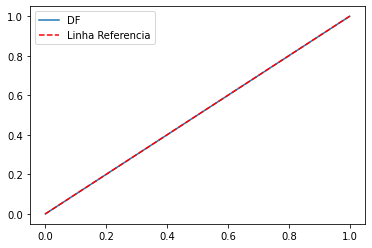

In [ ]:
estado_1 = 'DF'
dados_estado_1 = dados_completos[dados_completos['state'] == estado_1]
dados_estado_1 = dados_estado_1.sort_values('RDPC').reset_index(drop=True)
total = np.sum(dados_estado_1['RDPC'].values)
p_renda_estado_1 = np.append(np.array([0]), np.cumsum(dados_estado_1['RDPC'].values)/total)
p_familias_estado_1 = np.linspace(0, 1, len(p_renda_estado_1))
df_estado_1 = pd.DataFrame({'p_familias_estado_1': p_familias_estado_1, 
                            'p_renda_estado_1':p_renda_estado_1})

#Plotando o gráficio
fig, ax = plt.subplots()
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_estado_1'], label=estado_1)
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

- O Distrito Federal foi o estado que chamou atenção, pois seu índice de gini é igual a zero. Conforme podemos avaliar no gráfico plotado, não temos uma curva de variação de desigualdade.
  Analisando de maneira mais simples, poderíamos entender que o estado não possui desigualde de renda.
Porem avaliando mais a fundo, esse fator acontece, pois o distrito federal é muito pequeno em relação aos outros estados, possuindo apenas um municipio e com isso apenas um registro no dataframe. Nesse caso, uma opção seria avaliar o estado por suas regiões administrativas, que são 33.

link regiões administrativas
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_popula%C3%A7%C3%A3o


## 4 - Obtenha o sumário das colunas por UF (state), similar a figura abaixo (apresentar o código):

In [ ]:
dados_resumo = dados_completos.groupby('state').agg(CasosTotais = pd.NamedAgg('venda','sum'),
                                                    MortesTotais = pd.NamedAgg('desconto', 'sum'),
                                                    MediaESPVIDA = pd.NamedAgg('venda','mean'),
                                                    MediaE_ANOSESTUDO = pd.NamedAgg('E_ANOSESTUDO','mean'),
                                                    Mediana_IDHM = pd.NamedAgg('venda','median'),
                                                    Mediana_RDPC = pd.NamedAgg('RDPC','median'),
                                                    DP_RDPC = pd.NamedAgg('RDPC','std'))\
                                                    .reset_index()

In [ ]:
dados_resumo.head()

,state,CasosTotais,MortesTotais,MediaESPVIDA,MediaE_ANOSESTUDO,MediaT_T_ANALF18M,Mediana_IDHM,Mediana_RDPC,DP_RDPC
0,AC,87798,1813,70.991818,7.752273,26.106818,0.5885,313.705,127.780499
1,AL,235262,6048,69.367843,8.896961,35.308529,0.5625,233.440,79.124345
2,AM,423832,13674,70.924677,7.451774,20.889194,0.5640,227.585,98.250134
3,AP,122383,1950,72.028125,9.035625,13.997500,0.6410,402.440,133.018963
4,BA,1207512,26093,70.570288,8.453453,25.816427,0.5890,272.860,101.927806


In [ ]:
dados_resumo.to_excel('dados_resumo.xlsx')

## 5 – Por meio das análises na tabela obtida na questão 4, pode-se presumir algum resultado interessante? Apresente sua opinião

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MediaESPVIDA x Taxa analfabetismo')

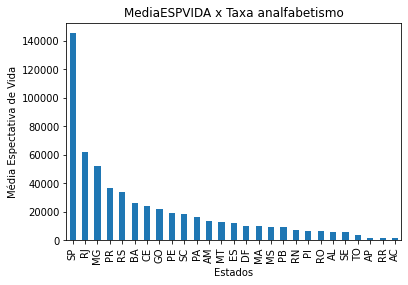

In [ ]:
dados_resumo_mortes = dados_resumo.sort_values("MortesTotais",ascending=False)
ax = dados_resumo_mortes.plot.bar(x = 'state', y = ["MortesTotais"],legend = None)
plt.xlabel('Estados')
plt.ylabel('Média Espectativa de Vida')
plt.title('MediaESPVIDA x Taxa analfabetismo')

In [ ]:
dados_resumo_esp = dados_resumo.sort_values("MediaESPVIDA",ascending=False)

Text(0.5, 1.0, 'MediaESPVIDA x Taxa analfabetismo')

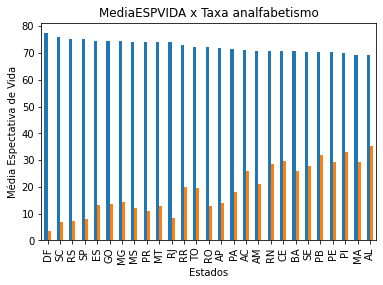

In [ ]:
dados_resumo_esp = dados_resumo.sort_values("MediaESPVIDA",ascending=False)

ax = dados_resumo_esp.plot.bar(x = 'state', y = ['MediaESPVIDA',"MediaT_T_ANALF18M"],legend = None)
plt.xlabel('Estados')
plt.ylabel('Média Espectativa de Vida')
plt.title('MediaESPVIDA x Taxa analfabetismo')

Text(0.5, 1.0, 'Renda e expectativa de vida')

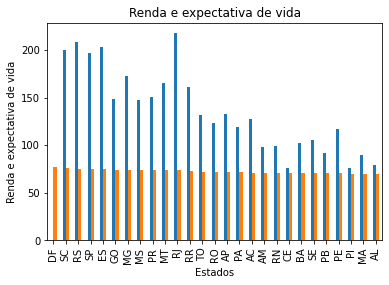

In [ ]:
ax = dados_resumo_esp.plot.bar(x = 'state', y = ["DP_RDPC","MediaESPVIDA"],legend = None)
plt.xlabel('Estados')
plt.ylabel('Renda e expectativa de vida')
plt.title('Renda e expectativa de vida')

- Analisando os graficos e a tabela, podemos verificar que estados com maiores taxas de analfabetistismo possuem uma espectativa de vida menor. Uma hipotese para isso, é que ao concluir um nivel de escolaridade, melhor são as chances do individuo ter mais recursos e acesso a condições sociais, como alimentação e saúde. Porém no caso do covid, conforme visto no primeiro grafico. Estados muito bem posicionados economicamente, tiveram valores altos de casos totais e mortes. Indicando que o virus afeta todos idependente da renda.
- Para uma analise melhor, o ideal seria fazer a quantidade de mortes por milhao em cada estado, visto que a população entre cada um se altera bastante.

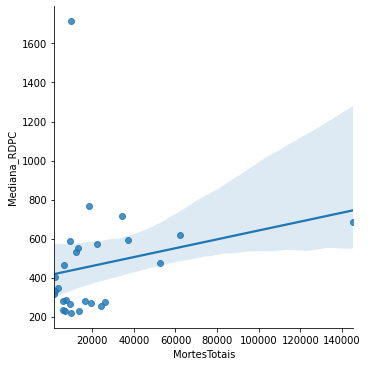

In [ ]:
## Grafico de dispersao Mortes Totais x Mediana_RDPC
sns.lmplot(x = 'MortesTotais', y ='Mediana_RDPC', data = dados_resumo)

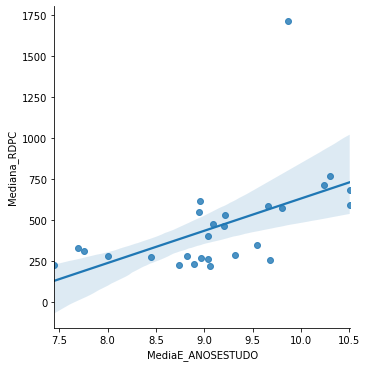

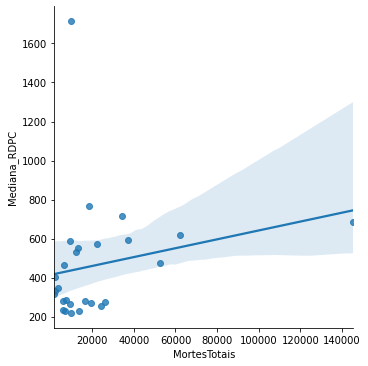

In [ ]:
## Grafico de dispersao Mortes Totais x Mediana_RDPC
sns.lmplot( x = 'MediaE_ANOSESTUDO', y ='Mediana_RDPC', data = dados_resumo)
sns.lmplot(x = 'MortesTotais', y ='Mediana_RDPC', data = dados_resumo)

####Analisando o primeiro gráfico podemos perceber que pessoas com mais anos de estudo possuem uma renda maior, a relação entre essas duas variáveis é proporcional. No segundo gráfico, percebemos que quando a renda aumenta as mortes diminuem. E quando a renda diminui as mortes aumentam. Isso mostra que no Brasil a covid é mais letal na população mais pobre  e menos anos de estudo. Uma inferência sobre esse resultado, seria que essa população possui menos acesso a saúde de qualidade. E devido a menor taxa de anos de estudo, são mais propensos a terem subempregos, trabalharem informalmente, e não podem cumprir quarentena como  a população com maior estudo e maior renda. 


<function matplotlib.pyplot.show>

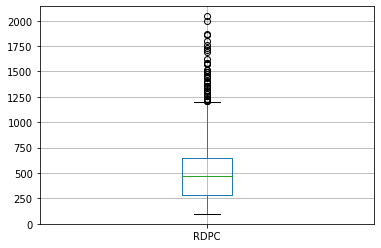

In [ ]:
dados_completos.boxplot(column = 'RDPC' )
plt.show

In [ ]:
#  Nesse gráfico identificamos que praticamente 75% das familias brasileiras possuem uma RDCP abaixo de R$ 750,00. 
#  O valor esta abaixo  do salário minimo que hoje é de 1.100,00. 
# # Em contrapartida existem outliers com um RDPC de até R$ 2.000,00 ressaltando como a renda brasileira é desigual.